In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
dataframe = pd.read_csv(r"Life Expectancy Data.csv")
#dataframe.info()
columns = dataframe.columns.to_list()
columns[10] = 'BMI'
columns[15] = 'HIV/AIDS'
columns[18] = 'thinness 1-19 years'
columns[19] = 'thinness 5-9 years'

dataframe.columns = columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
#dataframe.describe()

impute = SimpleImputer(missing_values=np.nan, strategy='median', fill_value=None)
dataframe['Life expectancy ']=impute.fit_transform(dataframe[['Life expectancy ']])
dataframe['Adult Mortality']=impute.fit_transform(dataframe[['Adult Mortality']])
dataframe['Alcohol']=impute.fit_transform(dataframe[['Alcohol']])
dataframe['Hepatitis B']=impute.fit_transform(dataframe[['Hepatitis B']])
dataframe['BMI']=impute.fit_transform(dataframe[['BMI']])
dataframe['Polio']=impute.fit_transform(dataframe[['Polio']])
dataframe['Total expenditure']=impute.fit_transform(dataframe[['Total expenditure']])
dataframe['Diphtheria ']=impute.fit_transform(dataframe[['Diphtheria ']])
dataframe['HIV/AIDS']=impute.fit_transform(dataframe[['HIV/AIDS']])
dataframe['GDP']=impute.fit_transform(dataframe[['GDP']])
dataframe['Population']=impute.fit_transform(dataframe[['Population']])
dataframe['thinness 1-19 years']=impute.fit_transform(dataframe[['thinness 1-19 years']])
dataframe['thinness 5-9 years']=impute.fit_transform(dataframe[['thinness 5-9 years']])
dataframe['Income composition of resources']=impute.fit_transform(dataframe[['Income composition of resources']])
dataframe['Schooling']=impute.fit_transform(dataframe[['Schooling']])

# dataframe.isnull().sum()

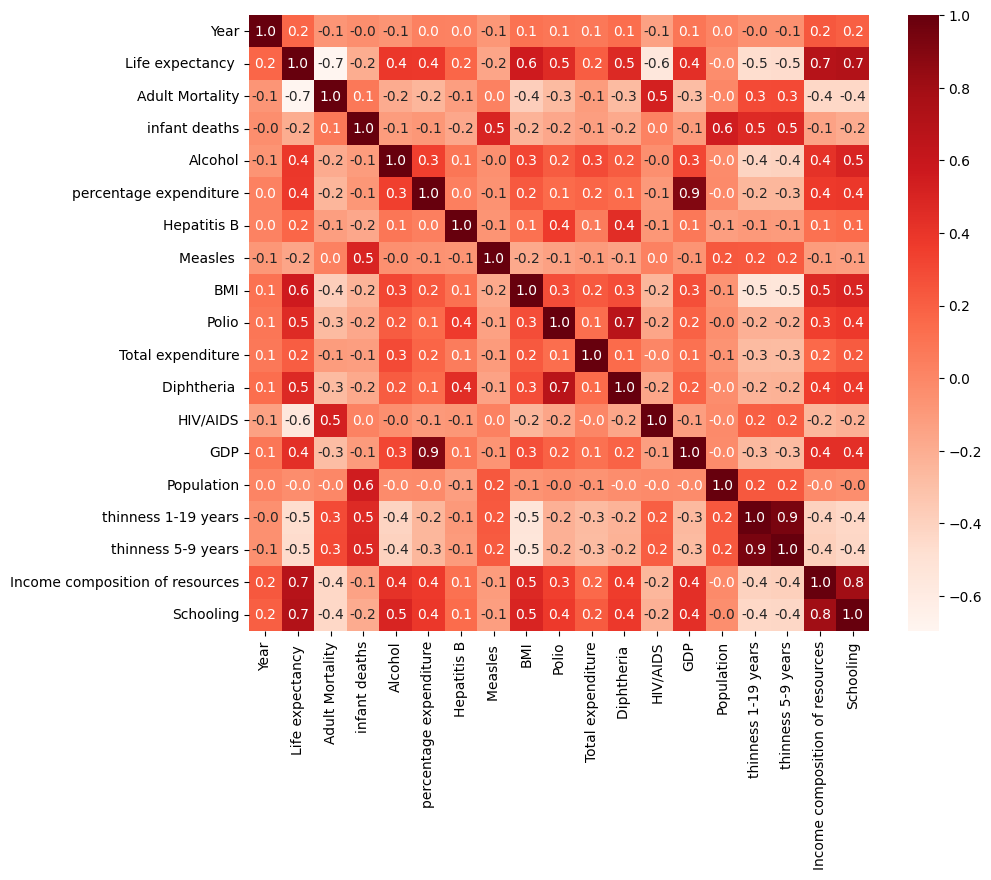

In [4]:
dataframe_V1 = dataframe.drop(['Country','Status','under-five deaths '],axis=1)

correlation_matrix = dataframe_V1.corr()
correlation_matrix

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".1f",cmap="Reds")
plt.show()

In [5]:
# dataframe_V1.boxplot(figsize=(50,40))
x_train, x_test, y_train, y_test = train_test_split(dataframe_V1.drop('Life expectancy ', axis=1),dataframe_V1['Life expectancy '],test_size=0.2,random_state=44)

x_train, x_test, y_train, y_test


(      Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure   
 456   2007            126.0              0     5.28              345.463714  \
 1390  2003            215.0              0     0.50                1.765413   
 475   2004            253.0             19     1.38                8.386119   
 1823  2005             28.0             33     0.20                4.259753   
 245   2010             81.0              0    10.22              665.735612   
 ...    ...              ...            ...      ...                     ...   
 2144  2006              3.0             17    11.79               12.251841   
 571   2004             11.0            360     3.04                1.586685   
 1197  2004            214.0           1600     1.20               27.338009   
 2801  2008             18.0             27     8.74                0.000000   
 1812  2013            144.0              0     0.01               15.606596   
 
       Hepatitis B  Measles    BMI  Po

In [6]:
min_max=MinMaxScaler()
x_train=min_max.fit_transform(x_train)
x_test=min_max.transform(x_test)

x_train, x_test

(array([[0.46666667, 0.17458101, 0.        , ..., 0.27719298, 0.63703704,
         0.57487923],
        [0.2       , 0.29888268, 0.        , ..., 0.00350877, 0.        ,
         0.56038647],
        [0.26666667, 0.35195531, 0.01055556, ..., 0.40701754, 0.48465608,
         0.46859903],
        ...,
        [0.26666667, 0.29748603, 0.88888889, ..., 0.98596491, 0.54814815,
         0.44444444],
        [0.53333333, 0.02374302, 0.015     , ..., 0.01754386, 0.71640212,
         0.5942029 ],
        [0.86666667, 0.19972067, 0.        , ..., 0.        , 0.71640212,
         0.46376812]]),
 array([[0.13333333, 0.24162011, 0.        , ..., 0.00350877, 0.69100529,
         0.58454106],
        [0.06666667, 0.02094972, 0.00111111, ..., 0.03157895, 0.80529101,
         0.66183575],
        [0.73333333, 0.06424581, 0.03666667, ..., 0.12280702, 0.42010582,
         0.4589372 ],
        ...,
        [0.93333333, 0.50977654, 0.02611111, ..., 0.19649123, 0.53650794,
         0.50241546],
        [0.6

In [7]:
## Linear Regression
reg = LinearRegression()
reg_out = reg.fit(x_train,y_train)
reg_score =reg.score(x_train,y_train)
reg_score

y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

root_mse, mae, r2

(4.160316723797302, 3.0892273107936923, 0.8210777531909318)

In [8]:
## Random Forest Regressor

reg_rf = RandomForestRegressor()
reg_out_rf = reg_rf.fit(x_train,y_train)
reg_score_rf =reg_rf.score(x_train,y_train)
reg_score_rf

y_pred_rf = reg_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
root_mse_rf=np.sqrt(mse_rf)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
r2_rf= r2_score(y_test, y_pred_rf)

root_mse_rf, mae_rf, r2_rf


(1.7229544200800737, 1.040886054421767, 0.9693126680593703)

In [9]:
pd.DataFrame(zip(dataframe_V1.columns,reg.coef_))

,0,1
0,Year,-0.439597
1,Life expectancy,-15.192097
2,Adult Mortality,-3.308365
3,infant deaths,1.450953
4,Alcohol,1.106881
5,percentage expenditure,-2.129859
6,Hepatitis B,-6.477399
7,Measles,3.482377
8,BMI,3.416053
9,Polio,1.344022
